### Dimension Reduction Analysis

Reproducing results from MPH2009

Create a dataframe containing the results from running:
* All specified datasets
* Group of algorithms
* Choice of quality measures

Then producing results as tables and visualizations.

In [12]:
import itertools
import pandas as pd
from functools import partial
import json

from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding

from MulticoreTSNE import MulticoreTSNE as TSNE
from umap import UMAP

import src
import src.data.datasets as datasets
from src.visualization.plotting import two_dim_multiplot, embeddable_image
import src.quality_measures as qm
from src.paths import processed_data_path
from src.data.experiment import run_algorithm

import logging

LOG_FORMAT = "%(levelname)s %(asctime)s - %(message)s"
DATE_FORMAT = "%m/%d/%Y %I:%M:%S %p"

logging.basicConfig(format=LOG_FORMAT, datefmt=DATE_FORMAT, level=logging.INFO) 
logger = logging.getLogger()

AttributeError: module 'src' has no attribute 'data'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
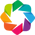

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
hv.extension('bokeh', 'matplotlib')
%opts Curve Scatter Bars [tools=['hover']]
%matplotlib inline
sns.set_context('poster')
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# location to save data
if not processed_data_path.exists():
    os.makedirs(processed_data_path)

## Specify datasets/algorithms/scores to train on

See notebook 16 for the generation of the json.

Pick the "best algorithm" parameters for each dataset/score combination using grid search.

In [17]:
def read_json(filename):
    with open(filename, 'r') as f:
        j = json.load(f)
    return j

In [18]:
train_input_json = '../models/experiment_models_mph.json'

In [21]:
read_json(train_input_json)

[{'algorithm': 'PCA',
  'algorithm_params': {'n_components': 2, 'random_state': 51129},
  'dataset': 'swiss-roll',
  'score': '1nn-error',
  'score_params': {'metric': 'euclidean'}},
 {'algorithm': 'PCA',
  'algorithm_params': {'n_components': 2, 'random_state': 5891},
  'dataset': 'swiss-roll',
  'score': 'continuity',
  'score_params': {'metric': 'euclidean', 'n_neighbors': 12}},
 {'algorithm': 'PCA',
  'algorithm_params': {'n_components': 2, 'random_state': 21915},
  'dataset': 'swiss-roll',
  'score': 'stress',
  'score_params': {'metric': 'euclidean'}},
 {'algorithm': 'PCA',
  'algorithm_params': {'n_components': 2, 'random_state': 25159},
  'dataset': 'swiss-roll',
  'score': 'strain',
  'score_params': {'metric': 'euclidean'}},
 {'algorithm': 'PCA',
  'algorithm_params': {'n_components': 2, 'random_state': 26330},
  'dataset': 'swiss-roll',
  'score': 'trustworthiness',
  'score_params': {'metric': 'euclidean', 'n_neighbors': 12}},
 {'algorithm': 'UMAP',
  'algorithm_params': {'

In [22]:
train_output_json = '../models/experiment_mph.json'

In [23]:
!python -m src.models.train_model experiment_models_mph.json -o ../models/experiment_mph.json

2018-09-07 14:59:19,155 - train_model - INFO - Building models from experiment_models_mph.json
Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV] n_components=2, n_neighbors=5, random_state=22786 ...............
[CV]  n_components=2, n_neighbors=5, random_state=22786, score=-0.09880239520958084, total=  10.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s
[CV] n_components=2, n_neighbors=5, random_state=22786 ...............
[CV]  n_components=2, n_neighbors=5, random_state=22786, score=-0.1021021021021021, total=   1.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s
[CV] n_components=2, n_neighbors=5, random_state=22786 ...............
[CV]  n_components=2, n_neighbors=5, random_state=22786, score=-0.10510510510510511, total=   1.6s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.3s remaining:    0.0s
[CV] n_components=2, n_neighbors=5, random_state=53671 ...............
[CV]  n_components=2, n_

[CV]  n_components=2, n_neighbors=12, random_state=22786, score=-0.06006006006006006, total=   1.9s
[CV] n_components=2, n_neighbors=12, random_state=22786 ..............
[CV]  n_components=2, n_neighbors=12, random_state=22786, score=-0.08708708708708708, total=   1.9s
[CV] n_components=2, n_neighbors=12, random_state=53671 ..............
[CV]  n_components=2, n_neighbors=12, random_state=53671, score=-0.07784431137724551, total=   1.9s
[CV] n_components=2, n_neighbors=12, random_state=53671 ..............
[CV]  n_components=2, n_neighbors=12, random_state=53671, score=-0.06606606606606606, total=   1.9s
[CV] n_components=2, n_neighbors=12, random_state=53671 ..............
[CV]  n_components=2, n_neighbors=12, random_state=53671, score=-0.07207207207207207, total=   1.9s
[CV] n_components=2, n_neighbors=13, random_state=22786 ..............
[CV]  n_components=2, n_neighbors=13, random_state=22786, score=-0.10479041916167664, total=   2.0s
[CV] n_components=2, n_neighbors=13, random_s

[CV]  n_components=2, n_neighbors=8, random_state=63107, score=0.912866027058403, total=   1.6s
[CV] n_components=2, n_neighbors=8, random_state=63107 ...............
[CV]  n_components=2, n_neighbors=8, random_state=63107, score=0.9288127555218175, total=   1.7s
[CV] n_components=2, n_neighbors=8, random_state=63107 ...............
[CV]  n_components=2, n_neighbors=8, random_state=63107, score=0.9300357591295587, total=   1.9s
[CV] n_components=2, n_neighbors=9, random_state=54598 ...............
[CV]  n_components=2, n_neighbors=9, random_state=54598, score=0.9194471595635987, total=   1.8s
[CV] n_components=2, n_neighbors=9, random_state=54598 ...............
[CV]  n_components=2, n_neighbors=9, random_state=54598, score=0.9388243569483633, total=   1.7s
[CV] n_components=2, n_neighbors=9, random_state=54598 ...............
[CV]  n_components=2, n_neighbors=9, random_state=54598, score=0.9328748462293772, total=   1.9s
[CV] n_components=2, n_neighbors=9, random_state=63107 .........

[CV]  n_components=2, n_neighbors=5, random_state=54599, score=-5586.271500612161, total=   1.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s remaining:    0.0s
[CV] n_components=2, n_neighbors=5, random_state=16529 ...............
[CV]  n_components=2, n_neighbors=5, random_state=16529, score=-5748.839146549209, total=   1.6s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.1s remaining:    0.0s
[CV] n_components=2, n_neighbors=5, random_state=16529 ...............
[CV]  n_components=2, n_neighbors=5, random_state=16529, score=-5548.43720521569, total=   1.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s remaining:    0.0s
[CV] n_components=2, n_neighbors=5, random_state=16529 ...............
[CV]  n_components=2, n_neighbors=5, random_state=16529, score=-5975.21747802798, total=   1.4s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.0s remaining:    0.0s
[CV] n_components=2, n_neighbors=6, random_state=54599 ...............
[CV]  n_co

[CV]  n_components=2, n_neighbors=13, random_state=54599, score=-6402.512468509119, total=   1.9s
[CV] n_components=2, n_neighbors=13, random_state=54599 ..............
[CV]  n_components=2, n_neighbors=13, random_state=54599, score=-6341.930776483831, total=   2.0s
[CV] n_components=2, n_neighbors=13, random_state=54599 ..............
[CV]  n_components=2, n_neighbors=13, random_state=54599, score=-6765.406247790729, total=   2.0s
[CV] n_components=2, n_neighbors=13, random_state=16529 ..............
[CV]  n_components=2, n_neighbors=13, random_state=16529, score=-6068.637982556086, total=   2.0s
[CV] n_components=2, n_neighbors=13, random_state=16529 ..............
[CV]  n_components=2, n_neighbors=13, random_state=16529, score=-6341.316510247381, total=   1.9s
[CV] n_components=2, n_neighbors=13, random_state=16529 ..............
[CV]  n_components=2, n_neighbors=13, random_state=16529, score=-6537.792594466299, total=   2.0s
[CV] n_components=2, n_neighbors=14, random_state=54599 .

[CV]  n_components=2, n_neighbors=9, random_state=31698, score=-3117.451594062258, total=   1.8s
[CV] n_components=2, n_neighbors=9, random_state=27608 ...............
[CV]  n_components=2, n_neighbors=9, random_state=27608, score=-3061.454121646449, total=   1.7s
[CV] n_components=2, n_neighbors=9, random_state=27608 ...............
[CV]  n_components=2, n_neighbors=9, random_state=27608, score=-3525.5849674604533, total=   1.8s
[CV] n_components=2, n_neighbors=9, random_state=27608 ...............
[CV]  n_components=2, n_neighbors=9, random_state=27608, score=-3591.2747407477004, total=   1.7s
[CV] n_components=2, n_neighbors=10, random_state=31698 ..............
[CV]  n_components=2, n_neighbors=10, random_state=31698, score=-2912.024958892541, total=   1.8s
[CV] n_components=2, n_neighbors=10, random_state=31698 ..............
[CV]  n_components=2, n_neighbors=10, random_state=31698, score=-3338.786382554442, total=   2.0s
[CV] n_components=2, n_neighbors=10, random_state=31698 ...

[CV]  n_components=2, n_neighbors=6, random_state=26095, score=0.9763136168234055, total=   1.4s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.3s remaining:    0.0s
[CV] n_components=2, n_neighbors=6, random_state=26095 ...............
[CV]  n_components=2, n_neighbors=6, random_state=26095, score=0.9744060435634363, total=   1.6s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.0s remaining:    0.0s
[CV] n_components=2, n_neighbors=6, random_state=26095 ...............
[CV]  n_components=2, n_neighbors=6, random_state=26095, score=0.9681621207853323, total=   1.4s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.6s remaining:    0.0s
[CV] n_components=2, n_neighbors=6, random_state=18231 ...............
[CV]  n_components=2, n_neighbors=6, random_state=18231, score=0.9772380753548371, total=   1.5s
[CV] n_components=2, n_neighbors=6, random_state=18231 ...............
[CV]  n_components=2, n_neighbors=6, random_state=18231, score=0.9699858841353277, total

[CV]  n_components=2, n_neighbors=14, random_state=26095, score=0.9838429322021567, total=   2.4s
[CV] n_components=2, n_neighbors=14, random_state=26095 ..............
[CV]  n_components=2, n_neighbors=14, random_state=26095, score=0.9863512160809458, total=   2.3s
[CV] n_components=2, n_neighbors=14, random_state=26095 ..............
[CV]  n_components=2, n_neighbors=14, random_state=26095, score=0.984026156522182, total=   2.2s
[CV] n_components=2, n_neighbors=14, random_state=18231 ..............
[CV]  n_components=2, n_neighbors=14, random_state=18231, score=0.9829524785611028, total=   2.2s
[CV] n_components=2, n_neighbors=14, random_state=18231 ..............
[CV]  n_components=2, n_neighbors=14, random_state=18231, score=0.9851823206354208, total=   2.4s
[CV] n_components=2, n_neighbors=14, random_state=18231 ..............
[CV]  n_components=2, n_neighbors=14, random_state=18231, score=0.9848481231629085, total=   2.3s
[CV] n_components=2, n_neighbors=15, random_state=26095 ..

## Look at the grid search results to see what they're like
...decide later what to do with this as part of the analysis

In [24]:
train_output = read_json(train_output_json)

In [26]:
train_output.keys()

dict_keys(['PCA_swiss-roll_1nn-error_0', 'PCA_swiss-roll_continuity_0', 'PCA_swiss-roll_strain_0', 'PCA_swiss-roll_stress_0', 'PCA_swiss-roll_trustworthiness_0', 'UMAP_swiss-roll_1nn-error_0', 'UMAP_swiss-roll_continuity_0', 'UMAP_swiss-roll_strain_0', 'UMAP_swiss-roll_stress_0', 'UMAP_swiss-roll_trustworthiness_0'])

## Run the dimension reductions on our data

In [33]:
predict_list_json = '../models/predict_list_mph.json'

In [34]:
read_json(predict_list_json)

[{'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'PCA_swiss-roll_1nn-error_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'PCA_swiss-roll_continuity_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'PCA_swiss-roll_strain_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'PCA_swiss-roll_stress_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'PCA_swiss-roll_trustworthiness_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'UMAP_swiss-roll_1nn-error_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'UMAP_swiss-roll_continuity_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'UMAP_swiss-roll_strain_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'UMAP_swiss-roll_stress_0'},
 {'dataset_name': 'swiss-roll',
  'force': True,
  'model_name': 'UMAP_swiss-roll_trustworthiness_0'}]

In [54]:
!python -m src.models.predict_model predict_list_mph.json -o prediction_mph.json

2018-09-07 15:36:51,449 - predict_model - INFO - Executing models from predict_list_mph.json
2018-09-07 15:36:51,462 - utils - INFO - PROCESS_TIME:PCA_swiss-roll_1nn-error_0_exp_swiss-roll_0    0.2 ms
2018-09-07 15:36:51,478 - utils - INFO - PROCESS_TIME:PCA_swiss-roll_continuity_0_exp_swiss-roll_0    0.2 ms
2018-09-07 15:36:51,493 - utils - INFO - PROCESS_TIME:PCA_swiss-roll_strain_0_exp_swiss-roll_0    0.1 ms
2018-09-07 15:36:51,519 - utils - INFO - PROCESS_TIME:PCA_swiss-roll_stress_0_exp_swiss-roll_0    0.1 ms
2018-09-07 15:36:51,534 - utils - INFO - PROCESS_TIME:PCA_swiss-roll_trustworthiness_0_exp_swiss-roll_0    0.1 ms
2018-09-07 15:36:51,563 - utils - INFO - PROCESS_TIME:UMAP_swiss-roll_1nn-error_0_exp_swiss-roll_0    0.4 ms
2018-09-07 15:36:51,585 - utils - INFO - PROCESS_TIME:UMAP_swiss-roll_continuity_0_exp_swiss-roll_0    0.3 ms
2018-09-07 15:36:51,605 - utils - INFO - PROCESS_TIME:UMAP_swiss-roll_strain_0_exp_swiss-roll_0    0.3 ms
2018-09-07 15:36:51,622 - utils - INFO - 

In [55]:
predict_output_json = '../models/prediction_mph.json'

In [57]:
predict_output = read_json(predict_output_json)

In [58]:
predict_output.keys()

dict_keys(['PCA_swiss-roll_1nn-error_0_exp_swiss-roll_0', 'PCA_swiss-roll_continuity_0_exp_swiss-roll_0', 'PCA_swiss-roll_strain_0_exp_swiss-roll_0', 'PCA_swiss-roll_stress_0_exp_swiss-roll_0', 'PCA_swiss-roll_trustworthiness_0_exp_swiss-roll_0', 'UMAP_swiss-roll_1nn-error_0_exp_swiss-roll_0', 'UMAP_swiss-roll_continuity_0_exp_swiss-roll_0', 'UMAP_swiss-roll_strain_0_exp_swiss-roll_0', 'UMAP_swiss-roll_stress_0_exp_swiss-roll_0', 'UMAP_swiss-roll_trustworthiness_0_exp_swiss-roll_0'])

In [68]:
analysis_list_json = '../models/analysis_list_mph.json'

In [70]:
analysis_list = read_json(analysis_list_json)

In [78]:
import inspect

In [90]:
from src.models.analyze import get_score

In [91]:
inspect.getfullargspec(get_score)

FullArgSpec(args=['input_path', 'score_params', 'pointwise'], varargs='low_dataset_name', varkw=None, defaults=(None, None, False), kwonlyargs=['high_dataset_name', 'score_name'], kwonlydefaults=None, annotations={})

In [99]:
def run_scores(**kwargs):
    pointwise = kwargs.pop('include_pointwise')
    s = get_score(pointwise=pointwise, **kwargs)
    return s


In [95]:
## To go into main for analyze.py

In [100]:
# decide which kind of output file to finish with here
for exp in analysis_list[:2]:
    score = run_scores(**exp)

In [101]:
score

array([6.90269995e-05, 1.02988623e-04, 2.42570895e-04, 2.55561216e-04,
       2.71692987e-06, 2.01477331e-04, 1.65053490e-04, 3.90643573e-04,
       7.21684497e-05, 3.38767193e-04, 7.37816268e-05, 3.56597045e-06,
       6.98760401e-05, 1.43402955e-04, 1.65308202e-04, 9.40736967e-05,
       2.35184242e-05, 1.78298523e-06, 6.87722873e-06, 1.63864833e-05,
       6.30837154e-05, 2.01647139e-04, 1.96977416e-05, 4.80302258e-04,
       2.78824928e-04, 1.56647988e-04, 6.75836305e-05, 2.42316183e-04,
       2.24995755e-05, 7.90456784e-05, 2.90626592e-04, 2.80862625e-04,
       3.42927492e-04, 1.54949907e-04, 3.38342673e-04, 1.66921379e-04,
       1.12922398e-04, 1.15384615e-04, 1.17082697e-04, 1.06979114e-05,
       5.78196638e-05, 4.07284768e-04, 2.17354390e-04, 7.75174053e-05,
       4.19426049e-05, 8.77907964e-05, 6.27440992e-05, 4.13822381e-04,
       9.76396672e-05, 2.15656308e-05, 1.37035150e-04, 1.27356088e-06,
       1.13941246e-04, 2.51316013e-05, 2.83155035e-04, 7.25080659e-05,
      

## Warnings

# Choose quality scores

In [15]:
# Do all the quality scores. Eventually add caching into the qm module itself.

In [16]:
high_distances = {}
for dataset_name in ds_names:
    dataset = datasets_dict[dataset_name]
    try:
        high_distances[dataset_name] = pairwise_distances(dataset.data, metric=metric)
    except Exception as e:
        print(f"Cannot complete {dataset_name}")
        pass

In [17]:
# make this a double loop instead...to match

In [18]:
%%time
low_distances_dict = {}
for ds_name in ds_names:
    low_distances_dict[ds_name] = {}
    for alg_name in algorithms.keys():
        try:
            _, low_distances, _ = qm.pairwise_distance_differences(high_distances=high_distances[ds_name],
                                                                   low_data=low_data[ds_name][alg_name].data,
                                                                   metric=metric)
            low_distances_dict[ds_name][alg_name] = low_distances
        except:
            print(f"Cannot complete {ds_name}, {alg_name}")
            pass

CPU times: user 15.6 s, sys: 13.4 s, total: 29 s
Wall time: 19.5 s


In [19]:
## This is next step is slow-ish. Do some profiling.

In [20]:
def scores_function(high_distances, low_distances_dict, ds_names, algorithms, scores):
    total_scores_dict = {}
    point_scores_dict = {}
    for ds_name in ds_names:
        logger.info(ds_name)
        total_scores_dict[ds_name] = {}
        point_scores_dict[ds_name] = {}
        for alg_name in algorithms.keys():
            logger.info(alg_name)
            total_scores_dict[ds_name][alg_name] = {}
            point_scores_dict[ds_name][alg_name] = {}
            for score_name, score_fcns in scores.items():
                #logger.info(score_name)
                if score_name == '1nn Error':
                    dataset = low_data[ds_name][alg_name]
                    point_score = score_fcns[0](data=dataset.data, classes=dataset.target)
                    total_score = score_fcns[1](data=dataset.data, classes=dataset.target)
                    total_scores_dict[ds_name][alg_name][score_name] = total_score
                    point_scores_dict[ds_name][alg_name][score_name] = point_score
                else:
                    #try:
                    point_score = score_fcns[0](high_distances=high_distances[ds_name],
                                                low_distances=low_distances_dict[ds_name][alg_name])
                    total_score = score_fcns[1](high_distances=high_distances[ds_name],
                                                low_distances=low_distances_dict[ds_name][alg_name])
                    total_scores_dict[ds_name][alg_name][score_name] = total_score
                    point_scores_dict[ds_name][alg_name][score_name] = point_score
                    #except:
                    #    pass
    return point_scores_dict, total_scores_dict

In [21]:
point_scores_dict, total_scores_dict = scores_function(high_distances, low_distances_dict, ds_names, algorithms, scores)

INFO 08/22/2018 02:43:24 PM - broken-swiss-roll
INFO 08/22/2018 02:43:24 PM - PCA
INFO 08/22/2018 02:43:25 PM - KernelPCA
INFO 08/22/2018 02:43:27 PM - LLE
INFO 08/22/2018 02:43:29 PM - HLLE
INFO 08/22/2018 02:43:30 PM - LaplacianEigenmaps
INFO 08/22/2018 02:43:32 PM - tSNE
INFO 08/22/2018 02:43:33 PM - Isomap
INFO 08/22/2018 02:43:35 PM - UMAP
INFO 08/22/2018 02:43:36 PM - coil-20
INFO 08/22/2018 02:43:36 PM - PCA
INFO 08/22/2018 02:43:39 PM - KernelPCA
INFO 08/22/2018 02:43:42 PM - LLE
INFO 08/22/2018 02:43:45 PM - HLLE
INFO 08/22/2018 02:43:48 PM - LaplacianEigenmaps
INFO 08/22/2018 02:43:51 PM - tSNE
INFO 08/22/2018 02:43:55 PM - Isomap
INFO 08/22/2018 02:43:57 PM - UMAP
INFO 08/22/2018 02:44:00 PM - difficult
INFO 08/22/2018 02:44:00 PM - PCA
INFO 08/22/2018 02:46:26 PM - KernelPCA
INFO 08/22/2018 02:48:39 PM - LLE
INFO 08/22/2018 02:50:54 PM - HLLE
INFO 08/22/2018 02:53:02 PM - LaplacianEigenmaps
INFO 08/22/2018 02:55:06 PM - tSNE
INFO 08/22/2018 02:57:11 PM - Isomap
INFO 08/22/2

In [22]:
# Note: tried doing this straight to a df once, and it was a nightmare

In [23]:
for k, v in point_scores_dict[ds_name][alg_name].items():
    print(k, len(v))

Strain 3000
Stress 3000
Trustworthiness 3000
Continuity 3000
1nn Error 3000


In [24]:
ds_name

'twinpeaks'

In [25]:
alg_name

'UMAP'

In [26]:
df_dict = {}
for ds_name in ds_names:
    ds_df = pd.DataFrame(columns=list(scores.keys())+['algorithm', 'item'])
    for alg_name in algorithms.keys():
        df = pd.DataFrame(point_scores_dict[ds_name][alg_name])
        df['algorithm'] = alg_name
        df['item'] = df.index.astype(int)
        ds_df = pd.concat([ds_df, df], sort=True)
    df_dict[ds_name] = ds_df

In [27]:
# merge it in with the dimension reduction data

In [28]:
ds_df_dict = {}
for ds_name in ds_names:
    df = pd.DataFrame(columns=['x', 'y', 'target', 'rotation', 'filename', 'algorithm', 'item'])
    for name, v in low_data[ds_name].items():
        i_df = pd.DataFrame()
        for i, axis in enumerate(['x', 'y']):
            i_df[f'{axis}'] = v['data'][:, i]
        i_df['target'] = v['target']
        i_df['rotation'] = v['metadata'].get('rotation', pd.np.NAN)
        i_df['filename'] = v['metadata'].get('filename', pd.np.NAN)
        i_df['algorithm'] = name
        i_df['item'] = i_df.index
        df = df.append(i_df, ignore_index=True)
    df.shape
    df['target'] = df['target']
    df['item'] = df['item'].astype(int)
    df_dict[ds_name]['item'] = df_dict[ds_name]['item'].astype(int)
    df = df.merge(df_dict[ds_name], on=['item', 'algorithm'])
    ds_df_dict[ds_name] = df

In [29]:
## TODO: make visualizations out of ds_df_dict

## Create summary results df

In [30]:
pd.set_option('max_colwidth',60)
pd.set_option('precision',4)

In [31]:
total_df = pd.DataFrame(columns=['dataset'])
for ds_name in ds_names:
        df = pd.DataFrame(total_scores_dict[ds_name])
        df['dataset'] = ds_name
        total_df = pd.concat([total_df, df], sort=True)
total_df = total_df[['dataset'] + list(algorithms.keys())]

In [32]:
total_df[total_df.dataset == ds_name]

dataset       PCA  KernelPCA        LLE       HLLE  \
1nn Error        twinpeaks    0.3300     0.2853     0.1650     0.2940   
Continuity       twinpeaks    0.9962     0.9957     0.9986     0.4781   
Strain           twinpeaks    3.6744    26.7609     1.0062     1.0224   
Stress           twinpeaks  546.1991  2623.3930  1823.2470  1928.2280   
Trustworthiness  twinpeaks    0.9403     0.9223     0.9963     0.4684   

                 LaplacianEigenmaps         tSNE    Isomap        UMAP  
1nn Error                    0.2900       0.1347    0.1357      0.1330  
Continuity                   0.9600       0.9985    0.9993      0.9980  
Strain                       1.0594   15199.7230    6.2759   1057.8249  
Stress                    1610.0000  110817.2979  482.7217  27924.8568  
Trustworthiness              0.9660       0.9993    0.9989      0.9990

In [33]:
total_df.loc[total_df.index == 'Strain']

dataset     PCA   KernelPCA     LLE    HLLE  \
Strain  broken-swiss-roll  3.8374  2.2173e+01  1.0085  1.0084   
Strain            coil-20  3.9468  5.3346e+13  1.0000  1.0000   
Strain          difficult  3.9431  5.8089e+00  1.0001  1.0002   
Strain               hiva  3.0774  1.0032e+00  1.0000  1.0000   
Strain          orl-faces  3.8403  2.0891e+14  1.0000  1.0000   
Strain         swiss-roll  3.7607  2.1748e+01  1.0059  1.0096   
Strain          twinpeaks  3.6744  2.6761e+01  1.0062  1.0224   

        LaplacianEigenmaps        tSNE    Isomap       UMAP  
Strain              1.0981   7256.7574    6.4529  1417.9896  
Strain              1.0000      1.0000  101.9587     1.0000  
Strain              1.0033   8169.5365   13.8614   976.1528  
Strain              1.0000    137.7492   48.4155   472.6095  
Strain              1.0000      1.0001   47.8683     1.0000  
Strain              1.1085   7606.4062   29.7879  1175.2658  
Strain              1.0594  15199.7230    6.2759  1057.8249

In [34]:
total_df.loc[total_df.index == 'Stress']

dataset         PCA   KernelPCA         LLE        HLLE  \
Stress  broken-swiss-roll  1.7791e+02  8.3430e+02  6.4108e+02  6.4116e+02   
Stress            coil-20  8.0128e+06  3.5270e+13  1.7242e+07  1.7242e+07   
Stress          difficult  2.7808e+03  2.6276e+03  9.1979e+03  9.2125e+03   
Stress               hiva  3.9089e+04  5.5011e+04  5.6057e+04  5.6057e+04   
Stress          orl-faces  1.1723e+06  8.8870e+12  2.2624e+06  2.2625e+06   
Stress         swiss-roll  1.9388e+02  8.4072e+02  6.5139e+02  6.4831e+02   
Stress          twinpeaks  5.4620e+02  2.6234e+03  1.8232e+03  1.9282e+03   

        LaplacianEigenmaps        tSNE      Isomap        UMAP  
Stress          5.6564e+02  2.7062e+04  3.1664e+02  1.1504e+04  
Stress          1.7242e+07  1.7191e+07  4.0542e+07  1.7222e+07  
Stress          8.8999e+03  3.4840e+05  7.4473e+03  1.1540e+05  
Stress          5.5952e+04  9.5970e+04  3.8867e+04  1.1199e+05  
Stress          2.2624e+06  2.2536e+06  2.7727e+06  2.2603e+06  
Stress          5.4179e+02  2.8602e+04  1.1638e+03  1.0370e+04  
Stress          1.6100e+03  1.1082e+05  4.8272e+02  2.7925e+04

In [35]:
total_df.loc[total_df.index == 'Trustworthiness']

dataset     PCA  KernelPCA     LLE    HLLE  \
Trustworthiness  broken-swiss-roll  0.9118     0.9017  0.7422  0.7440   
Trustworthiness            coil-20  0.8902     0.8941  0.8438  0.5622   
Trustworthiness          difficult  0.8911     0.8751  0.6411  0.7560   
Trustworthiness               hiva  0.6774     0.6763  0.6078  0.4818   
Trustworthiness          orl-faces  0.8600     0.8547  0.8839  0.7051   
Trustworthiness         swiss-roll  0.8629     0.8677  0.9255  0.9943   
Trustworthiness          twinpeaks  0.9403     0.9223  0.9963  0.4684   

                 LaplacianEigenmaps    tSNE  Isomap    UMAP  
Trustworthiness              0.7324  0.9993  0.8287  0.9985  
Trustworthiness              0.6508  0.9954  0.9186  0.9926  
Trustworthiness              0.7907  0.9974  0.8790  0.9807  
Trustworthiness              0.6065  0.9227  0.6939  0.8988  
Trustworthiness              0.7990  0.9676  0.8654  0.9709  
Trustworthiness              0.8611  0.9994  0.9996  0.9985  
Trustworthiness              0.9660  0.9993  0.9989  0.9990

In [36]:
total_df.loc[total_df.index == 'Continuity']

dataset     PCA  KernelPCA     LLE    HLLE  \
Continuity  broken-swiss-roll  0.9925     0.9920  0.8723  0.8592   
Continuity            coil-20  0.9741     0.9536  0.9529  0.6988   
Continuity          difficult  0.9885     0.9866  0.8408  0.9400   
Continuity               hiva  0.8635     0.8623  0.7851  0.4956   
Continuity          orl-faces  0.9315     0.8894  0.9311  0.8307   
Continuity         swiss-roll  0.9912     0.9910  0.9860  0.9946   
Continuity          twinpeaks  0.9962     0.9957  0.9986  0.4781   

            LaplacianEigenmaps    tSNE  Isomap    UMAP  
Continuity              0.8715  0.9984  0.9781  0.9954  
Continuity              0.8046  0.9929  0.9860  0.9947  
Continuity              0.8352  0.9849  0.9853  0.9904  
Continuity              0.4735  0.9190  0.9061  0.9262  
Continuity              0.7942  0.9521  0.9463  0.9597  
Continuity              0.9615  0.9965  0.9995  0.9962  
Continuity              0.9600  0.9985  0.9993  0.9980

In [37]:
total_df.loc[total_df.index == '1nn Error']

dataset     PCA  KernelPCA     LLE    HLLE  \
1nn Error  broken-swiss-roll  1.0000     1.0000  1.0000  1.0000   
1nn Error            coil-20  0.3326     0.3604  0.3007  0.1882   
1nn Error          difficult  0.4550     0.4520  0.5039  0.5059   
1nn Error               hiva  0.0653     0.0640  0.0637  0.0635   
1nn Error          orl-faces  0.6100     0.6225  0.4000  0.7125   
1nn Error         swiss-roll  1.0000     1.0000  1.0000  1.0000   
1nn Error          twinpeaks  0.3300     0.2853  0.1650  0.2940   

           LaplacianEigenmaps    tSNE  Isomap    UMAP  
1nn Error              1.0000  1.0000  1.0000  1.0000  
1nn Error              0.0993  0.0069  0.2062  0.1035  
1nn Error              0.4900  0.1493  0.4500  0.2940  
1nn Error              0.0632  0.0442  0.0536  0.0541  
1nn Error              0.5800  0.0150  0.4800  0.0625  
1nn Error              1.0000  1.0000  1.0000  1.0000  
1nn Error              0.2900  0.1347  0.1357  0.1330

## Visualizations

In [38]:
%output backend = 'bokeh'

In [39]:
ds_name = 'difficult'

color_index = 'Trustworthiness' # 'target', 'Trustworthiness', 'Continuity'
if color_index == 'target':
    cmap = 'spectral'
else:
    cmap = 'inferno_r'

In [40]:
%%opts Scatter [color_index=color_index colorbar=True colorbar_position='right'](cmap=cmap)
%%opts Scatter [width=450 height=350 labelled=[False, False]]

df = ds_df_dict[ds_name]
macro = hv.Dataset(df, ['x', 'y'])
scatter = []

#put them on the same color scale
c_min, c_max = min(df[color_index]), max(df[color_index])
for name in algorithms.keys():
    subset = macro.select(algorithm=name)
    new_scatter = subset.to(hv.Scatter, kdims=['x', 'y'], vdims=[color_index, 'rotation', 'item'], group=f'{ds_name}')
    #new_scatter = subset.to(hv.Scatter, kdims=['x', 'y'], vdims=[color_index], group=f'{ds_name}')
    new_scatter = new_scatter.relabel(f'{name}')

    # leave some padding around the edges
    alg_gb = df.groupby('algorithm')
    x_min, y_min = alg_gb.min().loc[name][['x', 'y']]
    x_max, y_max = alg_gb.max().loc[name][['x', 'y']]
    x_range_diff = (x_max - x_min)/10
    y_range_diff = (y_max - y_min)/10

    if color_index == 'Trustworthiness':
        new_scatter = new_scatter.redim.range(x=(x_min - x_range_diff, x_max + x_range_diff),
                                              y=(y_min - y_range_diff, y_max + y_range_diff),
                                              Trustworthiness=(c_min, c_max))
    elif color_index == 'Continuity':
        new_scatter = new_scatter.redim.range(x=(x_min - x_range_diff, x_max + x_range_diff),
                                              y=(y_min - y_range_diff, y_max + y_range_diff),
                                              Continuity=(c_min, c_max))
    elif color_index == 'target':
        new_scatter = new_scatter.redim.range(x=(x_min - x_range_diff, x_max + x_range_diff),
                                              y=(y_min - y_range_diff, y_max + y_range_diff))
    else:
        logger.warning("Unidentified color_index:{color_index}")
    scatter.append(new_scatter)

In [41]:
print(color_index)
p = scatter[0]
for f in scatter[1:]:
    p += f
p.cols(2)

Trustworthiness


:Layout
   .Difficult.PCA                :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.KernelPCA          :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.LLE                :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.HLLE               :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.LaplacianEigenmaps :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.TSNE               :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.Isomap             :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.UMAP               :Scatter   [x,y]   (Trustworthiness,rotation,item)

In [42]:
total_df[(total_df.dataset == ds_name) & ((total_df.index == 'Continuity') | (total_df.index == 'Trustworthiness'))]

dataset     PCA  KernelPCA     LLE   HLLE  \
Continuity       difficult  0.9885     0.9866  0.8408  0.940   
Trustworthiness  difficult  0.8911     0.8751  0.6411  0.756   

                 LaplacianEigenmaps    tSNE  Isomap    UMAP  
Continuity                   0.8352  0.9849  0.9853  0.9904  
Trustworthiness              0.7907  0.9974  0.8790  0.9807